In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from mip.model import *

Using Python-MIP package version 1.6.3


In [2]:
# importing the data to take a look at what we have

df = pd.read_csv('../data/family_data.csv',index_col=0)

df.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4
1,26,4,82,5,11,47,38,6,66,61,4
2,100,54,25,12,27,82,10,89,80,33,3
3,2,95,1,96,32,6,40,31,9,59,2
4,53,1,47,93,26,3,46,16,42,39,4


In [3]:
# load the penalties for days with high traffic
day_penalty = pd.read_csv('day_penalty.txt',sep='\t',index_col=0)['penalty']
day_penalty.head()

day
1     2.4
5     2.4
17    2.4
18    2.4
46    2.4
Name: penalty, dtype: float64

In [4]:
# for testing
num_days=100
num_families = 5000

In [5]:
df2 = df[:num_families].copy()

In [6]:
#people scaling 
people_scale = df2.n_people.sum()/df.n_people.sum()

max_people = np.around(1.5*df2.n_people.sum()/num_days)
min_people = np.around(df2.n_people.sum()/2/num_days)

if num_days==100 and num_families==5000:
    max_people = 300
    min_people = 125

# day scaling
day_scale = num_days/100

In [7]:
print(max_people)
print(min_people)
print(day_scale)
print(people_scale)

300
125
1.0
1.0


In [8]:
if num_days!=100:
    for c in df2.columns.tolist()[:10]:
        df2[c] = np.random.randint(1,num_days+1,num_families)

In [9]:
df2.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4
1,26,4,82,5,11,47,38,6,66,61,4
2,100,54,25,12,27,82,10,89,80,33,3
3,2,95,1,96,32,6,40,31,9,59,2
4,53,1,47,93,26,3,46,16,42,39,4


In [10]:
df2.describe()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000
mean,40.715000,41.601000,41.194200,41.595000,41.950600,42.63520,41.965000,42.739600,42.33900,42.608200,4.20060
std,29.054208,29.518375,28.821878,29.094602,29.045049,28.98729,28.711089,28.959156,28.69832,28.116088,1.53272
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,2.00000
25%,16.000000,16.000000,17.000000,17.000000,17.000000,18.00000,17.000000,18.000000,17.00000,19.000000,3.00000
50%,38.000000,38.000000,38.000000,39.000000,39.000000,40.00000,39.000000,39.000000,39.00000,39.000000,4.00000
75%,62.000000,66.000000,63.000000,66.000000,66.000000,66.00000,66.000000,67.000000,66.00000,66.000000,5.00000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,8.00000


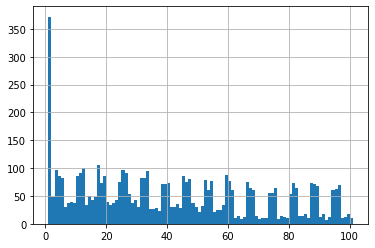

In [11]:
df2['choice_0'].hist(bins=[b for b in range(1,num_days+2,1)])

In [12]:
lower_limit = min_people
upper_limit = max_people

# creating the decision variables
choice = ['choice_0','choice_1', 'choice_2', 'choice_3', 'choice_4', 'choice_5', 
          'choice_6', 'choice_7', 'choice_8', 'choice_9','choice_10']
day = [i for i in range(1,num_days+1)]
fam_id = df2.index.tolist()
n_people = df['n_people'].to_dict()

In [13]:
choice_matrix = {}

for f in fam_id:
    
    if f%100==0:
        print('{}/{}'.format(f,len(df2)))
    
    choice_matrix[f] = {}
    
    for d in day:
        
        choice_to_check = df2.loc[f,df2.columns.tolist()[:10]].values
        
        if d in choice_to_check:
            c_loc = np.where(choice_to_check==d)[0][0]
        else:
            c_loc = 10
            
            
        choice_matrix[f][d] = {c:(0 if i!=c_loc else 1) for i,c in enumerate(choice)} 

0/5000
100/5000
200/5000
300/5000
400/5000
500/5000
600/5000
700/5000
800/5000
900/5000
1000/5000
1100/5000
1200/5000
1300/5000
1400/5000
1500/5000
1600/5000
1700/5000
1800/5000
1900/5000
2000/5000
2100/5000
2200/5000
2300/5000
2400/5000
2500/5000
2600/5000
2700/5000
2800/5000
2900/5000
3000/5000
3100/5000
3200/5000
3300/5000
3400/5000
3500/5000
3600/5000
3700/5000
3800/5000
3900/5000
4000/5000
4100/5000
4200/5000
4300/5000
4400/5000
4500/5000
4600/5000
4700/5000
4800/5000
4900/5000


In [14]:
# gift card contribution by choice
choice_gc = {}
choice_gc['choice_0'] = 0
choice_gc['choice_1'] = 50
choice_gc['choice_2'] = 50
choice_gc['choice_3'] = 100
choice_gc['choice_4'] = 200
choice_gc['choice_5'] = 200
choice_gc['choice_6'] = 300
choice_gc['choice_7'] = 300
choice_gc['choice_8'] = 400
choice_gc['choice_9'] = 500
choice_gc['choice_10'] = 500

# per member monetary contribution
choice_pm = {}
choice_pm['choice_0'] = 0
choice_pm['choice_1'] = 0
choice_pm['choice_2'] = 9
choice_pm['choice_3'] = 9
choice_pm['choice_4'] = 9
choice_pm['choice_5'] = 18
choice_pm['choice_6'] = 18
choice_pm['choice_7'] = 36
choice_pm['choice_8'] = 36
choice_pm['choice_9'] = 36+199
choice_pm['choice_10'] = 36+398


In [27]:
# set the parameters

max_diff_vals = [32,34,36,38,40] # this is the maximum difference between two days in total number of people
w1_vals = [0,1,2] # this is the weight applied to the simple difference ppd(d)-ppd(d+1)
w2_vals = [0,0.2,0.4] # this is the weight applied to the simple linear shopping penalty
w3_vals = [0,8,16,24] # this is the multiplier for the day penalty for high traffic days

In [16]:
all_results = {}

In [ ]:
for max_diff in max_diff_vals[:]:
    for w1 in w1_vals[:]:
        for w2 in w2_vals[:]:
            for w3 in w3_vals[:]:
                
                exp = 'max_diff_{}_w1_{}_w2_{}_w3_{}'.format(max_diff,w1,w2,w3)
                print(exp)
                
                results = {}
                
                results['max_diff'] = max_diff
                results['w1'] = w1
                results['w2'] = w2
                results['w3'] = w3
                
                # The prob variable is created to contain the problem data        
                m = Model()

                # The decision variables are actually the family and the day they are assigned
                print('Creating the decision variables...')
                x = [ [m.add_var(name='fam_{},day_{}'.format(f,d),var_type=BINARY) for d in day] for f in fam_id ]

                def ppd_fast(di):
                    if di==num_days:
                        di = num_days-1
                    return xsum(x[fi][di]*n_people[f] for fi,f in enumerate(fam_id))

                def ppd(d):
                    if d>num_days:
                        d=num_days
                    di = day.index(d)
                    return xsum(x[fi][di]*n_people[f] for fi,f in enumerate(fam_id))



                #m.objective = minimize(xsum(x[fi][di]*choice_matrix[f][d][c]*(choice_gc[c] + n_people[f]*choice_pm[c])
                #                            + ppd_fast(di)*(w1+w2) - w1*ppd_fast(di+1) - w2*125
                #         for c in choice for di,d in enumerate(day) for fi,f in enumerate(fam_id))) 
    
                print('Creating the Objective Function...')
                m.objective = minimize(xsum(x[fi][di]*choice_matrix[f][d][c]
                                            *(choice_gc[c] + n_people[f]*choice_pm[c]+w3*day_penalty[d])
                                       for c in choice for di,d in enumerate(day) for fi,f in enumerate(fam_id))
                                        + xsum(ppd_fast(di)*(w1+w2) 
                                               - w1*ppd_fast(di+1) - w2*125 for di,d in enumerate(day))) 



                # adding in the constraints

                # The first set of constraints ensures each family only has a single day selected
                print('Creating Family Constraint...')
                for fi,f in enumerate(fam_id):
                        m += xsum(x[fi][di] for di,d in enumerate(day)) == 1

                # the second set of constraints guarantee that the total number of visitors is between 125 and 300 for
                # for every single day leading up to christmas
                print('Creating total visitors constraint...')
                for di,d in enumerate(day):
                    m += ppd(d) >= lower_limit, ''
                    m += ppd(d) <= upper_limit, ''

                # adding this third constraint to prevent the difference between each day from climbing too high.
                print('Creating max difference between days constraint...')
                for di,d in enumerate(day[0:len(day)-1]):
                    m += ppd(d)-ppd(d+1) >= -max_diff, ''
                    m += ppd(d)-ppd(d+1) <= max_diff, ''


                #m.max_gap = 0.05
                print('Solving...')
                status = m.optimize(max_seconds=300)

                if status == OptimizationStatus.OPTIMAL:
                    print('optimal solution cost {} found'.format(m.objective_value))
                    results['status'] = 'Optimal'
                elif status == OptimizationStatus.FEASIBLE:
                    print('sol.cost {} found, best possible: {}'.format(m.objective_value, m.objective_bound))
                    results['status'] = 'Feasible'
                elif status == OptimizationStatus.NO_SOLUTION_FOUND:
                    print('no feasible solution found, lower bound is: {}'.format(m.objective_bound))
                    results['status'] = 'No Solution'
                    continue
                else:
                    results['status'] = 'INFEASIBLE OR SOMETHING ELSE'
                    print('No Solution found!')
                    continue

                
                 
                print('')
                print('Untangling the decision variables...')
                
                fam_day_dict = {}

                for i,v in enumerate(m.vars):

                    if i%100000==0:
                        print('{}/{}'.format(i,len(m.vars)))
                    if abs(v.x) > 1e-6: # only printing non-zeros
                        #print('{} : {}'.format(v.name, v.x))
                        s = v.name.split(',')
                        fam_day_dict[int(s[0][4:])] = int(s[1][4:])


                sel_series = pd.Series(fam_day_dict,name='assigned_day')

                #df2 = df2.join(sel_series)
                df2['assigned_day'] = sel_series.astype(int)
                #df2['assigned_day'] = df2.assigned_day.astype(int)
                df2.head()

                total_people = {}
                for d in day:
                    mask = df2['assigned_day']==d
                    total_people[d] = df2[mask].n_people.sum()
                    #print(total_people[d])



                def accounting_penalty_actual(Nd,diff):
                    return 300/max_people*(Nd-min_people)/400 * Nd**(0.5+np.fabs(diff)/50)

                total_accounting_penalty = sum([accounting_penalty_actual(total_people[d],total_people[d]-total_people[d+1])
                                                if d<100 
                                                else accounting_penalty_actual(total_people[d],0)
                                                for d in day])
                print('Accounting Penalty: {}'.format(total_accounting_penalty))
                results['Accounting Penalty'] = total_accounting_penalty

                # Adding a column to the dataframe for the choice made...

                def choice_func(r):
                    if r['assigned_day'] in r.values[:10]:
                        return choice[list(r.values[:10]).index(r.assigned_day)]
                    else:
                        return 'choice_10'

                df2['assigned_choice'] = df2.apply(choice_func,axis=1)
                #df2[df2.assigned_choice=='choice_0'].head()

                def simple_cost(r):
                    return choice_gc[r['assigned_choice']] + r['n_people']*choice_pm[r['assigned_choice']]

                total_simple_cost = df2.apply(simple_cost,axis=1).sum()
                print('Simple Cost: {}'.format(total_simple_cost))
                results['Simple Cost'] = total_simple_cost

                final_score = total_simple_cost + total_accounting_penalty
                print('Final Score: {}'.format(final_score))
                results['Final Score'] = final_score

                all_results[exp] = results
                
                df2['assigned_day'].to_csv('submission_data/submission_exp_{}.csv'.format(exp),header=True)
                df2.to_csv('experiment_data/data_exp_{}.txt'.format(exp),header=True,sep='|')
                
                with open('experiments/'+exp+'.txt','w') as fout:
                    for k,v in results.items():
                        fout.write('{}: {}\n'.format(k,v))
                        
                print('\n--------------------------------\n\n')
                        
                        

max_diff_32_w1_0_w2_0_w3_0
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...
optimal solution cost 77238.0 found

Untangling the decision variables...
0/500000
100000/500000
200000/500000
300000/500000
400000/500000
Accounting Penalty: 5956.170713084077
Simple Cost: 77238
Final Score: 83194.17071308408

--------------------------------


max_diff_32_w1_0_w2_0_w3_8
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...
optimal solution cost 150087.55199999976 found

Untangling the decision variables...
0/500000
100000/500000
200000/500000
300000/500000
400000/500000
Accounting Penalty: 5939.544250600286
Simple Cost: 77680
Final Score: 83619.54425060029

--------------------------------


max_diff_

Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...
optimal solution cost 154303.52800000025 found

Untangling the decision variables...
0/500000
100000/500000
200000/500000
300000/500000
400000/500000
Accounting Penalty: 5477.244303789644
Simple Cost: 80048
Final Score: 85525.24430378964

--------------------------------


max_diff_32_w1_1_w2_0.2_w3_16
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...
No Solution found!
max_diff_32_w1_1_w2_0.2_w3_24
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...
optimal solution cost 292094.4080000005 found



Solving...
sol.cost 257839.0800000009 found, best possible: 257839.0800000009

Untangling the decision variables...
0/500000
100000/500000
200000/500000
300000/500000
400000/500000
Accounting Penalty: 6286.9789929166645
Simple Cost: 109763
Final Score: 116049.97899291666

--------------------------------


max_diff_32_w1_2_w2_0.4_w3_24
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...
optimal solution cost 294082.759999999 found

Untangling the decision variables...
0/500000
100000/500000
200000/500000
300000/500000
400000/500000
Accounting Penalty: 6477.575057742471
Simple Cost: 74445
Final Score: 80922.57505774248

--------------------------------


max_diff_34_w1_0_w2_0_w3_0
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference b

300000/500000
400000/500000
Accounting Penalty: 7571.490765045055
Simple Cost: 74570
Final Score: 82141.49076504505

--------------------------------


max_diff_34_w1_1_w2_0.2_w3_0
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...
optimal solution cost 78454.60000000123 found

Untangling the decision variables...
0/500000
100000/500000
200000/500000
300000/500000
400000/500000
Accounting Penalty: 7446.7002249188
Simple Cost: 76587
Final Score: 84033.7002249188

--------------------------------


max_diff_34_w1_1_w2_0.2_w3_8
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...
optimal solution cost 147911.2800000003 found

Untangling the decision variables...
0/500000
100000/500000
200000/500000

100000/500000
200000/500000
300000/500000
400000/500000
Accounting Penalty: 8245.786086865744
Simple Cost: 72215
Final Score: 80460.78608686574

--------------------------------


max_diff_34_w1_2_w2_0.4_w3_8
Creating the decision variables...
Creating the Objective Function...
Creating Family Constraint...
Creating total visitors constraint...
Creating max difference between days constraint...
Solving...


In [24]:
for k, v in sorted(all_results.items(), key=lambda item: item[1]['Final Score'],reverse=False):
    print('{}:\t{}'.format(k,v['Final Score']))

max_diff_30_w1_0_w2_0.4_w3_10:	78583.7150860396
max_diff_30_w1_0_w2_0.2_w3_10:	78695.12720696606
max_diff_30_w1_1_w2_0.4_w3_15:	78774.21611331638
max_diff_30_w1_0_w2_0.4_w3_20:	79128.05885880635
max_diff_31_w1_0_w2_0_w3_10:	79201.01082521214
max_diff_30_w1_0_w2_0_w3_10:	79206.19814903972
max_diff_30_w1_2_w2_0.2_w3_10:	79567.47182235795
max_diff_30_w1_1_w2_0.4_w3_0:	79699.87884019397
max_diff_30_w1_0_w2_0.2_w3_5:	80367.1193814071
max_diff_30_w1_1_w2_0_w3_5:	80381.598706425
max_diff_30_w1_1_w2_0_w3_10:	80395.00451431616
max_diff_30_w1_0_w2_0_w3_25:	80410.03132787716
max_diff_30_w1_1_w2_0.4_w3_10:	80564.72687405263
max_diff_31_w1_0_w2_0_w3_25:	80660.6129130062
max_diff_30_w1_2_w2_0.4_w3_15:	80712.53265782988
max_diff_30_w1_0_w2_0.2_w3_20:	80797.66324907422
max_diff_31_w1_0_w2_0_w3_20:	80974.04620369163
max_diff_30_w1_2_w2_0.4_w3_5:	81001.05189251919
max_diff_30_w1_0_w2_0.4_w3_15:	81180.97899961984
max_diff_30_w1_1_w2_0_w3_25:	81200.93188275083
max_diff_30_w1_2_w2_0.2_w3_25:	81242.61420403

with a limit on the diff of 30 and solving for 500 seconds, the final score was 83115.97

In [ ]:
plt.plot(list(total_people.keys()),list(total_people.values()))

In [ ]:
# Creating penalties related to the days that have the highest consumption with no accounting

# sort the days by the number of visitors
sorted_days = {k: v for k, v in sorted(total_people.items(), key=lambda item: item[1],reverse=True)}

plt.plot([i for i in range(100)],list(sorted_days.values()))

In [ ]:
# Write the penalties to file
with open('day_penalty.txt','w') as fout:
    fout.write('day\tpenalty\n')
    for k,v in sorted_days.items():
        fout.write('{}\t{}\n'.format(k,v/125))
        print('{}\t{}'.format(k,v/125))
        
        
    